# 77.组合
输入：两个整数 n 和 k  
输出：1，，，，n 中所有可能的k个数组合  

## 思路
典型回溯题目

直接的想法是暴力搜索，k个循环找到子集  
但k过大的时候几十层循环是明显不行的

回溯法就很好地用 **递归** 解决了循环层数太大的问题  

把回溯过程抽象为树形结构：  
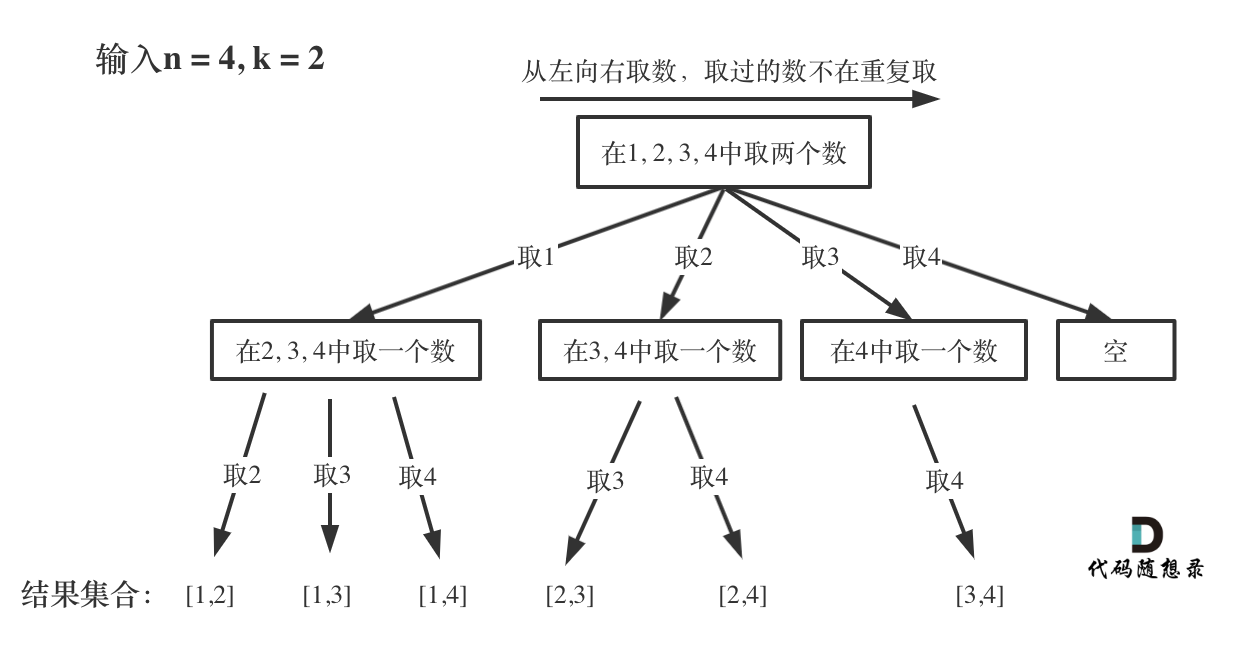  

- 每个边的搜索情况就是一种  
- 该方法每次从集合选取一个孩子（一种组合方式）  
- 树的宽度为n，深度为k
- 每次遍历到叶子节点就可以拿到一个目标集合
- 把叶子节点都收集起来

## 回溯三部曲
1. 返回值和参数
   - 返回值：none，不用返回
   - 参数：n，k，startindex（记录每一层递归要从哪里开始遍历）  
   - startindex防止出现重复
     - 第一次从[1,2,3,4]中取
     - 第二次从[2,3,4]取

2. 终止条件
   - path：存放根节点到叶子结点的路径（每次取出的数）
   - 当 path 的大小 == k，说明已经取完了，也就是到达叶子节点了  
   - 此时保存path到结果数组result中，并终止本层递归

3. 单层遍历
   - for循环用来横向遍历n
   - 递归用来纵向遍历所有节点
   - 套模板

时间复杂度: O(n * 2^n)  
空间复杂度: O(n)

In [ ]:
# 未剪枝版

class Solution:
    def combine(self, n, k) -> list[list[int]]:
        result = []  # 存放结果
        self.vacktracing(n, k, 1, [], result)
        return result
    
    def backtracing(self, n, k, startIndex, path, result):
        if len(path) == k:
            result.append(path[:])  # 搜索到叶子节点，保存结果并返回
            return

        for i in range(startIndex, n + 1):
            path.append(i)   # 把当前节点加入路径
            self.backtracing(n, k, i+1, path, result)
            path.pop()   # 回溯，撤销处理的节点，符合要求的在递归中都返回了

In [ ]:
# 剪枝：如果for循环的起始位置（i）之后的元素个数，已经不足 后续子集中需要的元素个数
# 就没有必要再搜索了

class solution:
    def combine(self, n, k):
        result = []
        self.backtracing(n, k, 1, [], result)
        return result
    
    def backtracing(self, n, k, startIndex, path, result):
        if len(path) == k:
            result.append(path[:])
            return result
        
        for i in range(startIndex, n - (k - len(path)) + 2):  # 剪枝优化取数的上限，rane是左闭右开
            path.append(i)   # 加入当前节点
            self.backtracing(n, k, i+1, path, result)  # 回溯搜索
            path.pop()   # 回溯，撤销处理过的节点（符合要求的再递归中已经返回了）